<a href="https://colab.research.google.com/github/sun-fox/Deep-Learning-CNN/blob/master/Dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#  ! pip install kaggle

In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [0]:
# !ls ./gdrive/My\ Drive/Colab\ Notebooks/

In [0]:
# !cp /content/gdrive/My\ Drive/Colab\ Notebooks/kaggle.json ~/.kaggle/kaggle.json

In [0]:
# !kaggle datasets list

In [0]:
# !kaggle datasets list -s dogs

In [0]:
# !kaggle datasets download -d jessicali9530/stanford-dogs-dataset

In [0]:
# !unzip \*.zip

In [56]:
!ls 

annotations  gdrive  kaggle.json  stanford-dogs-dataset.zip
data	     images  sample_data  train


In [0]:
import os

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import xml.etree.ElementTree as ET

import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from PIL import Image
from imgaug import augmenters as iaa

from sklearn.model_selection import train_test_split

from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.utils import *
from keras.callbacks import *

from keras.applications.densenet import DenseNet121, preprocess_input

In [58]:
breed_list = os.listdir("./images/Images/")

num_classes = len(breed_list)
print("{} breeds".format(num_classes))

n_total_images = 0
for breed in breed_list:
    n_total_images += len(os.listdir("./images/Images/{}".format(breed)))
print("{} images".format(n_total_images))

120 breeds
20580 images


In [0]:
def show_dir_images(breed, n_to_show):
    plt.figure(figsize=(16,16))
    img_dir = "./images/Images/{}/".format(breed)
    images = os.listdir(img_dir)[:n_to_show]
    for i in range(n_to_show):
        img = mpimg.imread(img_dir + images[i])
        plt.subplot(n_to_show/4+1, 4, i+1)
        plt.imshow(img)
        plt.axis('off')

n02093256-Staffordshire_bullterrier


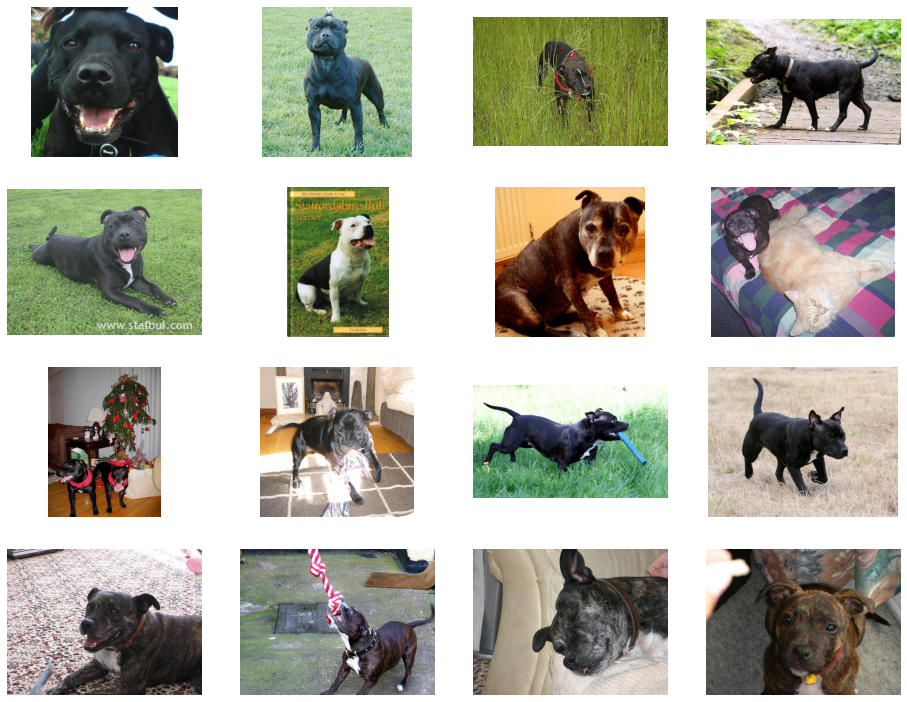

In [60]:
print(breed_list[0])
show_dir_images(breed_list[0], 16)